# 1.sigmoid函数
sigmoid函数，也就是s型曲线函数，如下：

函数：
$$
f(x)=\frac{1}{1-e^{-x}}
$$
求导：
$$
f'(x)=f(x)(1-f(x))
$$
上面是我们常见的形式，虽然知道这样的形式，也知道计算流程，不够感觉并不太直观，下面来分析一下。
## 1.1 从指数函数到sigmoid
首先我们来画出指数函数的基本图形：
$$
y=e^x 和 y=e^{-x}
$$

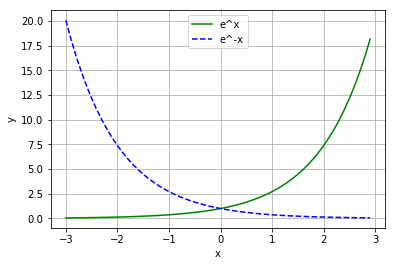

In [31]:
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(-3, 3, 0.1)
fig, ax = plt.subplots()
l1, = ax.plot(X, np.exp(X), 'k', color='g')
l2, = ax.plot(X, np.exp(-X), 'k--',color='b')
ax.legend((l1, l2), ('e^x', 'e^-x'), loc='upper center')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
plt.show()

从上图，我们得到了这样的几个信息，指数函数过(0,1)点，单调递增/递减，定义域为(−∞,+∞)，值域为(0,+∞)，再来我们看一下sigmoid函数的图像：

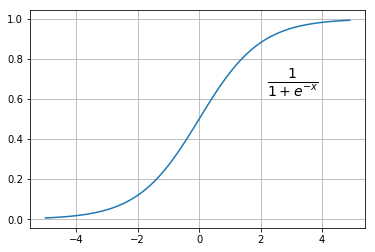

In [46]:
X = np.arange(-5, 5, 0.1)
Y = 1/(1+np.exp(-X))
plt.plot(X, Y)
plt.grid(True)
tex = r'$\frac{1}{1+e^{-x}}$'
plt.text(2.2, 0.6, tex, fontsize=20, va='bottom')
plt.show()

如果直接把e−x放到分母上，就与ex图像一样了，所以分母加上1，就得到了上面的图像，定义域是(−∞,+∞)，值域是(0,1)，那么就有一个很好地特性了，就是不管x是什么，都可以得到(0,1)之间的值；
## 1.2 对数函数与sigmoid
首先来看一下对数函数的图像：

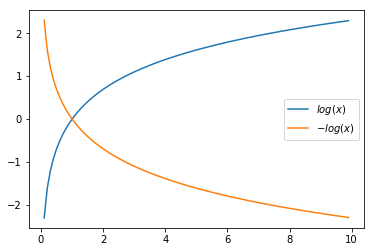

In [66]:
import matplotlib.pyplot as plt
X = np.arange(0.1, 10., 0.1)
l1 = plt.plot(X, np.log(X))
l2 = plt.plot(X, -np.log(X))
plt.legend(('$log(x)$', '$-log(x)$'), loc='right')
plt.show()

​ 对数函数的图像如上，单调递减，有一个比较好的特性就是在(0,1)之间，在接近0的时候，就近无穷大，接近1的时候为0，如果我们把前面的sigmoid函数放到自变量的位置上，就得到了(0,1)的图像；

​ 我们如何来衡量一个结果与实际计算值得差距呢？一种思路就是，如果结果越接近，差值就越小，反之越大，这个函数就提供了这样一种思路，如果计算得到的值越接近1，那么那么表示与世界结果越接近，反之越远，所以利用这个函数，可以作为逻辑回归分类器的损失函数，如果所有的结果都能接近结果值，那么就越接近于0，如果所有的样本计算完成以后，结果接近于0，就表示计算结果与实际结果非常相近。

**（Logistic是Sigmoid的一种代表，Logistic又叫“对数几率函数”，与对数函数$ln(x)$不同）**
# 2、sigmoid函数求导
​ sigmoid导数具体的推导过程如下： 
\begin{align}
f'(x)&=(\frac{1}{1+e^{-x}})'\\
&=\frac{-e^{-x}(-1)}{(1+e^{-x})^2}\\
&=\frac{1+e^{-x}-1}{(1+e^{-x})^2}\\
&=\frac{1}{(1+e^{-x})}(1-\frac{1}{(1+e^{-x})})\\
&=f(x)(1-f(x))\\
\end{align}
可视化一线求导以后的函数：

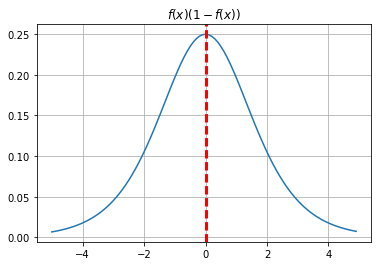

In [93]:
X = np.arange(-5, 5, 0.1)
Y = (1/(1+np.exp(-X)))*(1-1/(1+np.exp(-X)))
plt.plot(X, Y)
plt.axvline(x=0, ymin=0.,ymax=1, linewidth=3, color='r', linestyle='--')
plt.title('$f(x)(1-f(x))$')
plt.grid(True)
plt.show()

上图反应的就是sigmoid函数的斜率变化，可以看到$(-\infty, 0]$增长越来越快，$[0, +\infty)$下降越来越慢.
# 3、神经网络逆向传播Backforward propagation
神经网络的损失函数可以理解为是一个多级的复合函数，求导使用链式法则。  

假设一个d X q X l的神经网络
<img src="image/20170718141653072.png" style="height:50%;width:50%;">  


假设隐藏层和输出层的激活函数都是Sigmoid函数
对训练集$(x_k, y_k)$，神经网络出书为$\hat y = (\hat y^k_1, \hat y^k_2, ...,\hat y^k_l)$
$$
\hat y = f(\beta_j - \theta_j)\\
$$
则在网络$(x_k, y_k)$上的均方误差为（不一定是均方差来计算误差，也可能其他）：
$$
E_k = \frac{1}{2}\Sigma_j(\hat y^k_j - y^k_j)^2
$$
则任意参数v的更新为：
$$
v \leftarrow \hat v + \Delta v
$$
BP算法基于梯度下降(gradient dwscent)策略，以负梯度方向进行调整，给定学习率$\alpha$，即：
$$
\Delta w_{ij} = -\alpha\frac{\partial E_k}{\partial w_{hj}}
$$
根据链式法则求导
$$
\frac{\partial E_k}{\partial w_{hj}} = \frac{\partial E_k}{\partial {\hat y^k_j}}*\frac{\partial \hat y^k_j}{\partial \beta_j}*\frac{\partial \beta_j}{\partial w_{hj}}
$$
根据$\beta_j$的定义，有
$$
\frac{\partial \beta_j}{\partial w_{hj}}=b_h
$$
根据上面Sigmoid的导数性质
\begin{align}
f'(x)=f(x)(1-f(x))\\
g_j&=\frac{\partial E_k}{\partial \hat y^k_j}*\frac{\partial \hat y^k_j}{\partial \beta_j}\\
&=-(\hat y^k_j-y^k_j)f'(\beta_j-\theta_j)\\
&=\hat y^k_j(1-\hat y^k_j)(y^k_j-\hat y^k_j)
\end{align}
所以：
$$
\Delta w_{hj}=\alpha g_j b_h
$$
其他同理：
\begin{align}
\Delta \theta_j &=-\alpha \frac{\partial E_k}{\partial \theta_j}=-\alpha \frac{\partial E_k}{\partial \hat y^k_j}*\frac{\partial \hat y^k_j}{\partial \theta^k_j}\\
&=-\alpha g_i\\
\end{align}

$$
\Delta v_{ih}=\alpha e_h x_i,\\
\Delta \gamma_h=-\alpha e_h,\\
$$
其中：
\begin{align}
e_h&=-\frac{\partial E_k}{\partial b_h}*-\frac{\partial b_h}{\partial \alpha_h}\\
&=-\Sigma_j \frac{\partial E_k}{\partial \beta_j}*\frac{\partial \beta_j}{\partial b_h} f'(\alpha_h - \gamma_h)\\
&=\Sigma_j w_{hj} g_j f'(\alpha_h - \gamma_h)\\
&=b_h(1-b_h)\Sigma_j w_{hj}g_j 
\end{align}

学习率$\alpha$可以设定不一样，例如（输入层-隐藏层）的$\alpha$与例如（隐藏层-输出层）的$\alpha$可以不同

Layer1是input layer

Layer2是hidden layer

Layer3是output layer

Y是实际的预测值
初始化数据：
\begin{align}
input = \left\lgroup \matrix{x_1 \cr x_2 \cr x_3} \right\rgroup\\
weight_1 = \left\lgroup \matrix{w_{11} & w_{12} \cr w_{21} & w_{22}\cr w_{21} & w_{22}} \right\rgroup\\
weight_2 = \left\lgroup \matrix{w_1 \cr w_2 \cr w_3} \right\rgroup\\
\end{align}
Forward propagation的过程：
$$
l_1 = f(input^T * weight_1)\\
l_2 = f(l_1 *  weight_2)
$$
l2就是ouput层的输出，然后我们计算误差：
$$
\hat Y = l_2\\
err = \hat Y - Y\\
$$
然后Backforward propagation的过程：

$$
err_2 = err\\
\Delta l_2 = err * f'(l_2)\\
err_1 = \Delta l_2 * weight_2^T\\
\Delta l_1 = err_1 * f'(l_1)\\
weight_2 += {l_1}^T * \Delta l_2\\
weight_1 += {input}^T * \Delta l_1
$$
